In [66]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define constants

In [67]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 3
EPOCHS = 20

# Data augmentation and normalization

In [68]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load and augment training data

In [69]:
train_generator = train_datagen.flow_from_directory(
    '../../datasets/meme_dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Training subset
)

Found 213 images belonging to 3 classes.


# Load and augment validation data

In [70]:
validation_generator = train_datagen.flow_from_directory(
    '../../datasets/meme_dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

Found 52 images belonging to 3 classes.


# Create a convolutional neural network

In [71]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model

In [72]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [73]:
history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/20
7/7 [==============================] - 197s 27s/step - loss: 1.3464 - accuracy: 0.4178 - val_loss: 0.8916 - val_accuracy: 0.5769
Epoch 2/20
7/7 [==============================] - 5s 804ms/step - loss: 0.8818 - accuracy: 0.6103 - val_loss: 0.7005 - val_accuracy: 0.8654
Epoch 3/20
7/7 [==============================] - 5s 702ms/step - loss: 0.6594 - accuracy: 0.7277 - val_loss: 0.4980 - val_accuracy: 0.9231
Epoch 4/20
7/7 [==============================] - 6s 931ms/step - loss: 0.4196 - accuracy: 0.9014 - val_loss: 0.3068 - val_accuracy: 0.9615
Epoch 5/20
7/7 [==============================] - 5s 715ms/step - loss: 0.2842 - accuracy: 0.9390 - val_loss: 0.2085 - val_accuracy: 0.9615
Epoch 6/20
7/7 [==============================] - 6s 936ms/step - loss: 0.1951 - accuracy: 0.9484 - val_loss: 0.1225 - val_accuracy: 0.9808
Epoch 7/20
7/7 [==============================] - 5s 709ms/step - loss: 0.1333 - accuracy: 0.9671 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

# Save the trained model

In [74]:
model.save('meme_classification_model.h5')
print("Model trained and saved successfully!")

Model trained and saved successfully!


# Plot training history

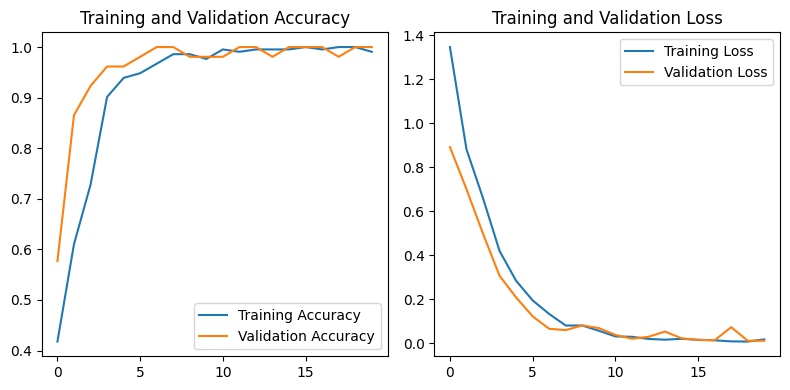

In [75]:
def plot_training_history(history):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Download sample images

In [38]:
!wget https://i.imgflip.com/67jakj.jpg -O sample1.jpg
!wget https://slidechef.net/wp-content/uploads/2023/03/mr-incredible-meme.jpg -O sample2.jpg
!wget https://static.wikia.nocookie.net/lol/images/d/d1/Drake-hotline-bling-airplane-seats-memes.jpg -O sample3.jpg

--2023-08-15 11:02:47--  https://i.imgflip.com/67jakj.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.18.64.15, 104.18.255.14
Connecting to i.imgflip.com (i.imgflip.com)|104.18.64.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66243 (65K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>]  64.69K  --.-KB/s    in 0.002s  

2023-08-15 11:02:47 (40.3 MB/s) - ‘sample1.jpg’ saved [66243/66243]

--2023-08-15 11:02:47--  https://slidechef.net/wp-content/uploads/2023/03/mr-incredible-meme.jpg
Resolving slidechef.net (slidechef.net)... 104.21.35.90, 172.67.216.60, 2606:4700:3030::ac43:d83c, ...
Connecting to slidechef.net (slidechef.net)|104.21.35.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102041 (100K) [image/jpeg]
Saving to: ‘sample2.jpg’

sample2.jpg         100%[===================>]  99.65K   506KB/s    in 0.2s    

2023-08-15 11:02:49 (506 KB/s) - ‘sample2.jpg’ saved [102041/102041]

--20

# Load model

In [76]:
model = tf.keras.models.load_model('meme_classification_model.h5')

# Define class names

In [77]:
class_names = ['drake', 'incredible', 'spidey']

# Utility Functions

In [78]:
# Load and preprocess the input image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Make predictions and display images
def meme_pred(input_image_path):
    input_image = load_and_preprocess_image(input_image_path)
    predictions = model.predict(input_image)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    confidence = predictions[0][predicted_class] * 100

    plt.imshow(load_img(input_image_path))
    plt.title(f'Predicted Class: {predicted_class_name}\nConfidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()

# Test meme predictions

1/1 [==============================] - 0s 81ms/step


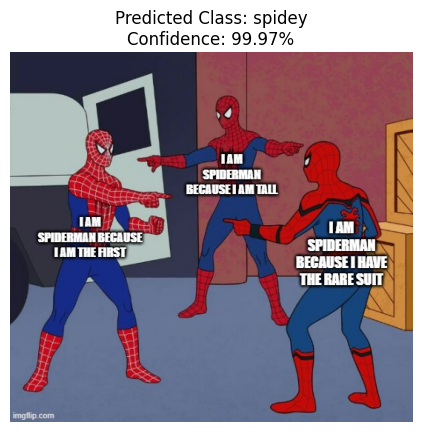

In [79]:
meme_pred('sample1.jpg')

1/1 [==============================] - 0s 19ms/step


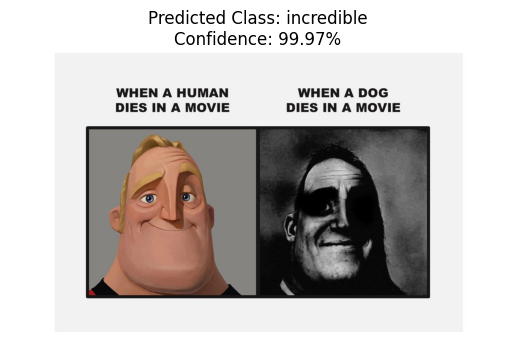

In [80]:
meme_pred('sample2.jpg')

1/1 [==============================] - 0s 19ms/step


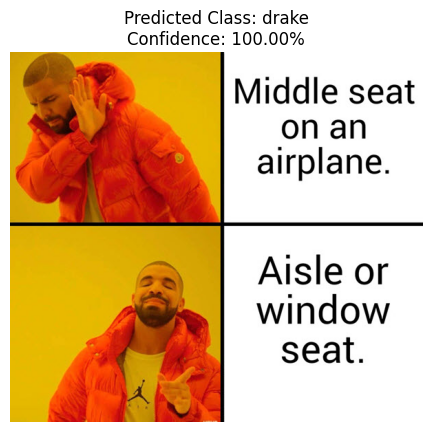

In [81]:
meme_pred('sample3.jpg')

1/1 [==============================] - 0s 20ms/step


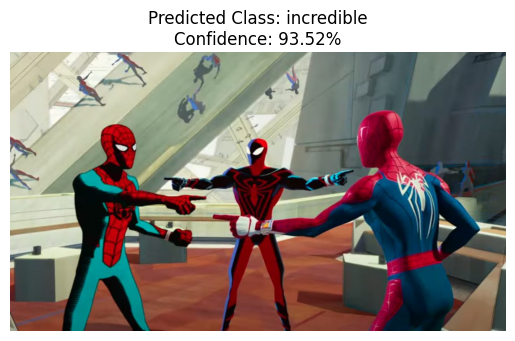

In [82]:
meme_pred('spiderverse.jpg')